In [ ]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_squared_error
import numpy as np

# Load the data
file_path = r'C:\Users\syounas\OneDrive - Enova Facilities Management\Tasks\GitHub\HubgradeDataCleaning\Sana\Data\Train_1.csv'
data = pd.read_csv(file_path)

# Rename columns for convenience
data.columns = ['ts', 'temp']

# Convert 'ts' column to datetime and handle timezone offset
data['ts'] = pd.to_datetime(data['ts'].str.replace(' Dubai', ''), errors='coerce')
# Drop rows where datetime parsing failed
data = data.dropna(subset=['ts'])

# Clean temperature column and convert to numeric
data['temp'] = data['temp'].str.replace('°C', '').astype(float)

# Separate data for temperature
df_temp = data[['ts', 'temp']].rename(columns={'ts': 'ds', 'temp': 'y'})

# Ensure 'ds' column is timezone-naive
df_temp['ds'] = df_temp['ds'].dt.tz_localize(None)

# Initialize Prophet models with tuned hyperparameters
model_temp = Prophet(seasonality_mode='additive',     # Adjust based on data exploration
                     interval_width=0.95,              # Adjust prediction interval if needed
                     changepoint_prior_scale=0.01)    # Tune based on data patterns

# Fit the models
model_temp.fit(df_temp)

# Create future DataFrames for both temp and new_point (next 200 samples, assuming 5-minute intervals)
future_temp = model_temp.make_future_dataframe(periods=200, freq='5T')

# Predict the future values
forecast_temp = model_temp.predict(future_temp)

# Calculate RMSE for the last 200 points in the training data
forecast_train = model_temp.predict(df_temp)
y_true = df_temp['y'].values[-200:]
y_pred = forecast_train['yhat'].values[-200:]
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print(f"RMSE for the last 200 training points: {rmse}")

# Format the predicted 'ds' column to "2023-03-11T08:20:00+04:00 Dubai"
forecast_temp['ds'] = forecast_temp['ds'].dt.tz_localize('UTC').dt.tz_convert('Asia/Dubai').dt.strftime('%Y-%m-%dT%H:%M:%S%z') + ' Dubai'

# Save only the predicted 200 future values (ds and yhat columns) to a CSV file
output_path = r'C:\Users\syounas\OneDrive - Enova Facilities Management\Tasks\GitHub\HubgradeDataCleaning\Sana\Data\predictions.csv'
forecast_temp[['ds', 'yhat']].tail(200).to_csv(output_path, index=False)

In [236]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_squared_error
import numpy as np

# Load the data
file_path = r'C:\Users\syounas\OneDrive - Enova Facilities Management\Tasks\GitHub\HubgradeDataCleaning\Sana\Data\Train_1.csv'
data = pd.read_csv(file_path)

# Rename columns for convenience
data.columns = ['ts', 'temp']

# Convert 'ts' column to datetime and handle timezone offset
data['ts'] = pd.to_datetime(data['ts'].str.replace(' Dubai', ''), errors='coerce')
# Drop rows where datetime parsing failed
data = data.dropna(subset=['ts'])

# Clean temperature column and convert to numeric
data['temp'] = data['temp'].str.replace('°C', '').astype(float)

# Separate data for temperature
df_temp = data[['ts', 'temp']].rename(columns={'ts': 'ds', 'temp': 'y'})

# Ensure 'ds' column is timezone-naive
df_temp['ds'] = df_temp['ds'].dt.tz_localize(None)

# Split data into training and testing sets
train_size = int(len(df_temp) * 0.8)
train_df = df_temp[:train_size]
test_df = df_temp[train_size:]

# Initialize Prophet model with tuned hyperparameters
model_temp = Prophet(seasonality_mode='additive',     # Adjust based on data exploration
                     interval_width=0.95,              # Adjust prediction interval if needed
                     changepoint_prior_scale=0.01)    # Tune based on data patterns

# Fit the model
model_temp.fit(train_df)

# Create future DataFrame for the test set
future_temp = model_temp.make_future_dataframe(periods=len(test_df), freq='5T')

# Predict the future values
forecast_temp = model_temp.predict(future_temp)

# Calculate RMSE for the test set
y_true = test_df['y'].values
y_pred = forecast_temp['yhat'].values[-len(test_df):]
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print(f"RMSE for the test set: {rmse}")

# Format the predicted 'ds' column to "2023-03-11T08:20:00+04:00 Dubai"
forecast_temp['ds'] = forecast_temp['ds'].dt.tz_localize('UTC').dt.tz_convert('Asia/Dubai').dt.strftime('%Y-%m-%dT%H:%M:%S%z') + ' Dubai'

# Save only the predicted 200 future values (ds and yhat columns) to a CSV file
output_path = r'C:\Users\syounas\OneDrive - Enova Facilities Management\Tasks\GitHub\HubgradeDataCleaning\Sana\Data\pred.csv'
forecast_temp[['ds', 'yhat']].tail(200).to_csv(output_path, index=False)


12:26:55 - cmdstanpy - INFO - Chain [1] start processing
12:26:55 - cmdstanpy - INFO - Chain [1] done processing


RMSE for the test set: 0.5991127687924247


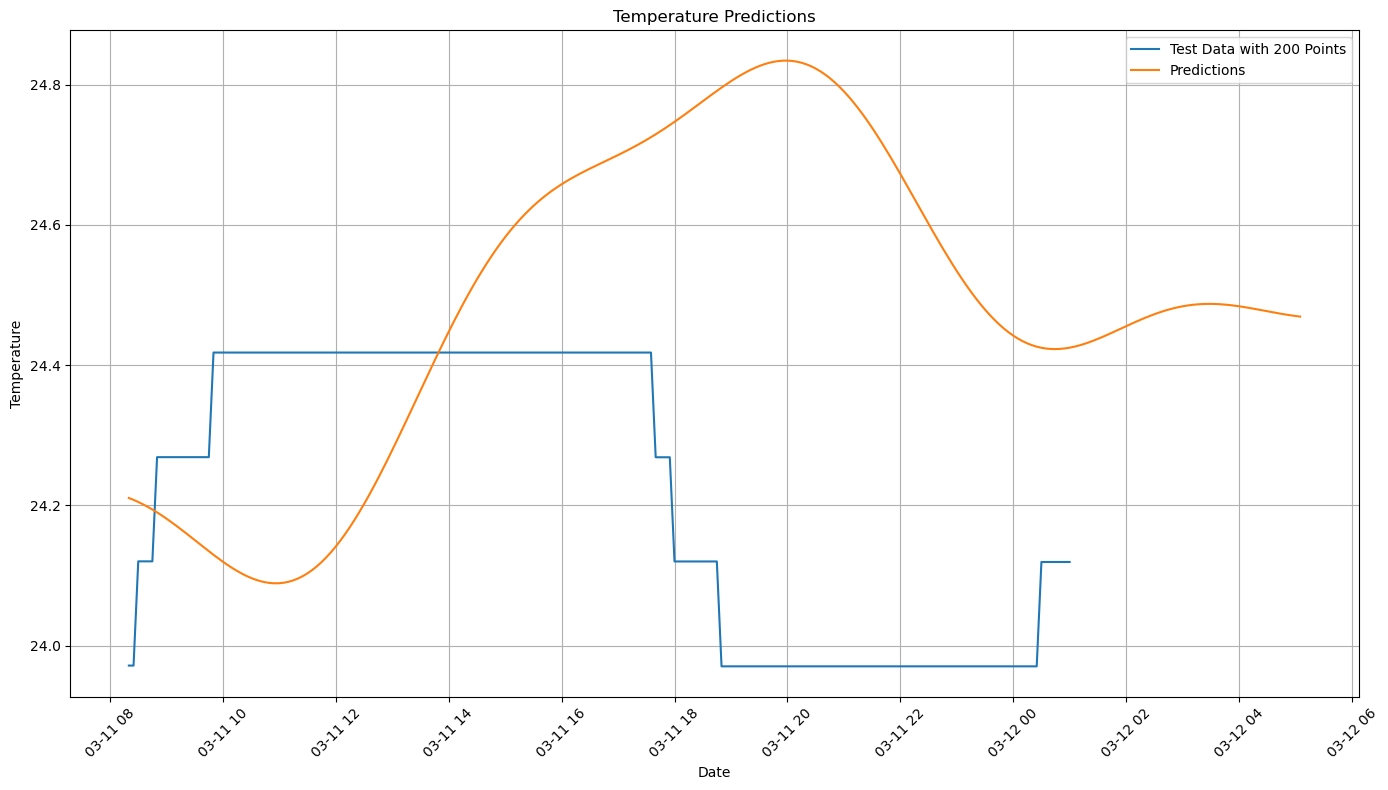

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the Excel and CSV files
test_with200_path = r"C:\Users\syounas\OneDrive - Enova Facilities Management\Tasks\GitHub\HubgradeDataCleaning\Sana\Data\test_with200.xlsx"
predictions_path = r"C:\Users\syounas\OneDrive - Enova Facilities Management\Tasks\GitHub\HubgradeDataCleaning\Sana\Data\pred.csv"

test_with200 = pd.read_excel(test_with200_path)
predictions = pd.read_csv(predictions_path)

# Function to parse the datetime correctly
def parse_datetime(ds):
    ds = ds.replace(" Dubai", "")
    return pd.to_datetime(ds)

# Convert 'ds' columns to datetime using the parsing function
test_with200['ds'] = test_with200['ds'].apply(parse_datetime)
predictions['ds'] = predictions['ds'].apply(parse_datetime)

# Plotting the data
plt.figure(figsize=(14, 8))

plt.plot(test_with200['ds'], test_with200['yhat'], label='Test Data with 200 Points')
plt.plot(predictions['ds'], predictions['yhat'], label='Predictions')

plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Temperature Predictions')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()


In [68]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_squared_error
import numpy as np
from datetime import datetime, timezone

# Load the data
file_path = r'C:\Users\syounas\OneDrive - Enova Facilities Management\Tasks\GitHub\HubgradeDataCleaning\Sana\Data\Train_1.csv'
data = pd.read_csv(file_path)

# Rename columns for convenience
data.columns = ['ts', 'temp']

# Convert 'ts' column to datetime and handle timezone offset
data['ts'] = pd.to_datetime(data['ts'].str.replace(' Dubai', ''), errors='coerce')
# Drop rows where datetime parsing failed
data = data.dropna(subset=['ts'])

# Clean temperature column and convert to numeric
data['temp'] = data['temp'].str.replace('°C', '').astype(float)

# Separate data for temperature
df_temp = data[['ts', 'temp']].rename(columns={'ts': 'ds', 'temp': 'y'})

# Ensure 'ds' column is timezone-naive
df_temp['ds'] = df_temp['ds'].dt.tz_localize(None)

# Initialize Prophet model with tuned hyperparameters
model_temp = Prophet(seasonality_mode='additive',     # Adjust based on data exploration
                     interval_width=0.95,              # Adjust prediction interval if needed
                     changepoint_prior_scale=0.01)    # Tune based on data patterns

# Fit the model
model_temp.fit(df_temp)

# Define dq_start
dq_start = datetime(2023, 3, 11, 4, 20, tzinfo=timezone.utc)

# Create future DataFrame starting from dq_start
future_temp = pd.DataFrame()
future_temp['ds'] = pd.date_range(start=dq_start, periods=200+50, freq='5T')

# Ensure 'ds' column in future_temp is timezone-naive
future_temp['ds'] = future_temp['ds'].dt.tz_localize(None)

# Predict the future values
forecast_temp = model_temp.predict(future_temp)

# Calculate RMSE for the last 200 points in the training data
forecast_train = model_temp.predict(df_temp)
y_true = df_temp['y'].values[-200:]
y_pred = forecast_train['yhat'].values[-200:]
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print(f"RMSE for the last 200 training points: {rmse}")

# Format the predicted 'ds' column to "2023-03-11T08:20:00+04:00 Dubai"
forecast_temp['ds'] = forecast_temp['ds'].dt.tz_localize('UTC').dt.tz_convert('Asia/Dubai').dt.strftime('%Y-%m-%dT%H:%M:%S%z') + ' Dubai'

# Save only the predicted 200 future values
output_path = r'C:\Users\syounas\OneDrive - Enova Facilities Management\Tasks\GitHub\HubgradeDataCleaning\Sana\Data\pred.csv'
forecast_temp[['ds', 'yhat']].to_csv(output_path, index=False)


10:47:17 - cmdstanpy - INFO - Chain [1] start processing
10:47:17 - cmdstanpy - INFO - Chain [1] done processing


RMSE for the last 200 training points: 0.09921707706281344


In [128]:
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import numpy as np
from datetime import datetime, timedelta, timezone

# Load the data
file_path = r'C:\Users\syounas\OneDrive - Enova Facilities Management\Tasks\GitHub\HubgradeDataCleaning\Sana\Data\Train_1.csv'
data = pd.read_csv(file_path)

# Rename columns for convenience
data.columns = ['ts', 'temp']

# Convert 'ts' column to datetime and handle timezone offset
data['ts'] = pd.to_datetime(data['ts'].str.replace(' Dubai', ''), errors='coerce', dayfirst=True)
# Drop rows where datetime parsing failed
data = data.dropna(subset=['ts'])

# Clean temperature column and convert to numeric
data['temp'] = data['temp'].str.replace('°C', '').astype(float)

# Separate data for temperature
df_temp = data[['ts', 'temp']].rename(columns={'ts': 'ds', 'temp': 'y'})

# Ensure 'ds' column is timezone-naive
df_temp['ds'] = df_temp['ds'].dt.tz_localize(None)

# Extract numerical features from datetime
df_temp['year'] = df_temp['ds'].dt.year
df_temp['month'] = df_temp['ds'].dt.month
df_temp['day'] = df_temp['ds'].dt.day
df_temp['hour'] = df_temp['ds'].dt.hour
df_temp['minute'] = df_temp['ds'].dt.minute

# Define dq_start with the correct timezone offset
dq_start = datetime(2023, 3, 11, 4, 20, tzinfo=timezone.utc)

# Create future DataFrame starting from dq_start
future_periods = 200 + 50  # Number of future periods to predict
future_temp = pd.DataFrame()
future_temp['ds'] = [dq_start + timedelta(minutes=5*i) for i in range(future_periods)]

# Extract features for XGBoost
future_temp['year'] = future_temp['ds'].dt.year
future_temp['month'] = future_temp['ds'].dt.month
future_temp['day'] = future_temp['ds'].dt.day
future_temp['hour'] = future_temp['ds'].dt.hour
future_temp['minute'] = future_temp['ds'].dt.minute

# Initialize XGBoost model
model_temp = xgb.XGBRegressor()

# Fit the model
model_temp.fit(df_temp[['year', 'month', 'day', 'hour', 'minute']], df_temp['y'])

# Predict the future values
future_temp['yhat'] = model_temp.predict(future_temp[['year', 'month', 'day', 'hour', 'minute']])

# Calculate RMSE for the last 200 points in the training data
y_true = df_temp['y'].values[-200:]
y_pred = model_temp.predict(df_temp[['year', 'month', 'day', 'hour', 'minute']])[-200:]
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print(f"RMSE for the last 200 training points: {rmse}")

'
# Convert 'ds' to datetime with timezone information and correct format
forecast_temp['ds'] = pd.to_datetime(forecast_temp['ds'], errors='coerce', dayfirst=True)

# Check if any NaT values are present after conversion
print(forecast_temp[forecast_temp['ds'].isnull()])

# Convert timezone to Asia/Dubai
forecast_temp['ds'] = forecast_temp['ds'].dt.tz_localize('UTC').dt.tz_convert('Asia/Dubai')

# Format the datetime as required
forecast_temp['ds'] = forecast_temp['ds'].dt.strftime('%Y-%m-%dT%H:%M:%S%z') + ' Dubai'

# Save only the predicted 200 future values
output_path = r'C:\Users\syounas\OneDrive - Enova Facilities Management\Tasks\GitHub\HubgradeDataCleaning\Sana\Data\xgboost.csv'
forecast_temp[['ds', 'yhat']].tail(200).to_csv(output_path, index=False)


RMSE for the last 200 training points: 0.005892704023383235
     ds  year  month  day  hour  minute       yhat
0   NaT  2023      3   11     4      20  24.267172
1   NaT  2023      3   11     4      25  24.267506
2   NaT  2023      3   11     4      30  24.268814
3   NaT  2023      3   11     4      35  24.269949
4   NaT  2023      3   11     4      40  24.270126
..   ..   ...    ...  ...   ...     ...        ...
245 NaT  2023      3   12     0      45  24.122059
246 NaT  2023      3   12     0      50  24.122650
247 NaT  2023      3   12     0      55  24.125538
248 NaT  2023      3   12     1       0  24.122389
249 NaT  2023      3   12     1       5  24.122223

[250 rows x 7 columns]


In [132]:
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import numpy as np
from datetime import datetime, timedelta, timezone

# Load the data
file_path = r'C:\Users\syounas\OneDrive - Enova Facilities Management\Tasks\GitHub\HubgradeDataCleaning\Sana\Data\Train_1.csv'
data = pd.read_csv(file_path)

# Rename columns for convenience
data.columns = ['ts', 'temp']

# Convert 'ts' column to datetime and handle timezone offset
data['ts'] = pd.to_datetime(data['ts'].str.replace(' Dubai', ''), errors='coerce', dayfirst=True)
# Drop rows where datetime parsing failed
data = data.dropna(subset=['ts'])

# Clean temperature column and convert to numeric
data['temp'] = data['temp'].str.replace('°C', '').astype(float)

# Separate data for temperature
df_temp = data[['ts', 'temp']].rename(columns={'ts': 'ds', 'temp': 'y'})

# Ensure 'ds' column is timezone-naive
df_temp['ds'] = df_temp['ds'].dt.tz_localize(None)

# Extract numerical features from datetime
df_temp['year'] = df_temp['ds'].dt.year
df_temp['month'] = df_temp['ds'].dt.month
df_temp['day'] = df_temp['ds'].dt.day
df_temp['hour'] = df_temp['ds'].dt.hour
df_temp['minute'] = df_temp['ds'].dt.minute

# Define dq_start
dq_start = datetime(2023, 3, 11, 8, 20, tzinfo=timezone.utc)

# Create future DataFrame starting from dq_start
future_periods = 200 # Number of future periods to predict
future_temp = pd.DataFrame()
future_temp['ds'] = [dq_start + timedelta(minutes=5*i) for i in range(future_periods)]

# Extract features for XGBoost
future_temp['year'] = future_temp['ds'].dt.year
future_temp['month'] = future_temp['ds'].dt.month
future_temp['day'] = future_temp['ds'].dt.day
future_temp['hour'] = future_temp['ds'].dt.hour
future_temp['minute'] = future_temp['ds'].dt.minute

# Initialize XGBoost model
model_temp = xgb.XGBRegressor()

# Fit the model
model_temp.fit(df_temp[['year', 'month', 'day', 'hour', 'minute']], df_temp['y'])

# Predict the future values
future_temp['yhat'] = model_temp.predict(future_temp[['year', 'month', 'day', 'hour', 'minute']])

# Calculate RMSE for the last 200 points in the training data
y_true = df_temp['y'].values[-200:]
y_pred = model_temp.predict(df_temp[['year', 'month', 'day', 'hour', 'minute']])[-200:]
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print(f"RMSE for the last 200 training points: {rmse}")

# Format the 'ds' column in future_temp to "2023-03-11T08:20:00+04:00 Dubai"
future_temp['ds'] = future_temp['ds'].dt.strftime('%Y-%m-%dT%H:%M:%S%z') + ' Dubai'

# Save only the predicted 200 future values (ds and yhat columns) to a CSV file
output_path = r'C:\Users\syounas\OneDrive - Enova Facilities Management\Tasks\GitHub\HubgradeDataCleaning\Sana\Data\xgboost_predictions.csv'
future_temp[['ds', 'yhat']].tail(200).to_csv(output_path, index=False)


RMSE for the last 200 training points: 0.005892704023383235


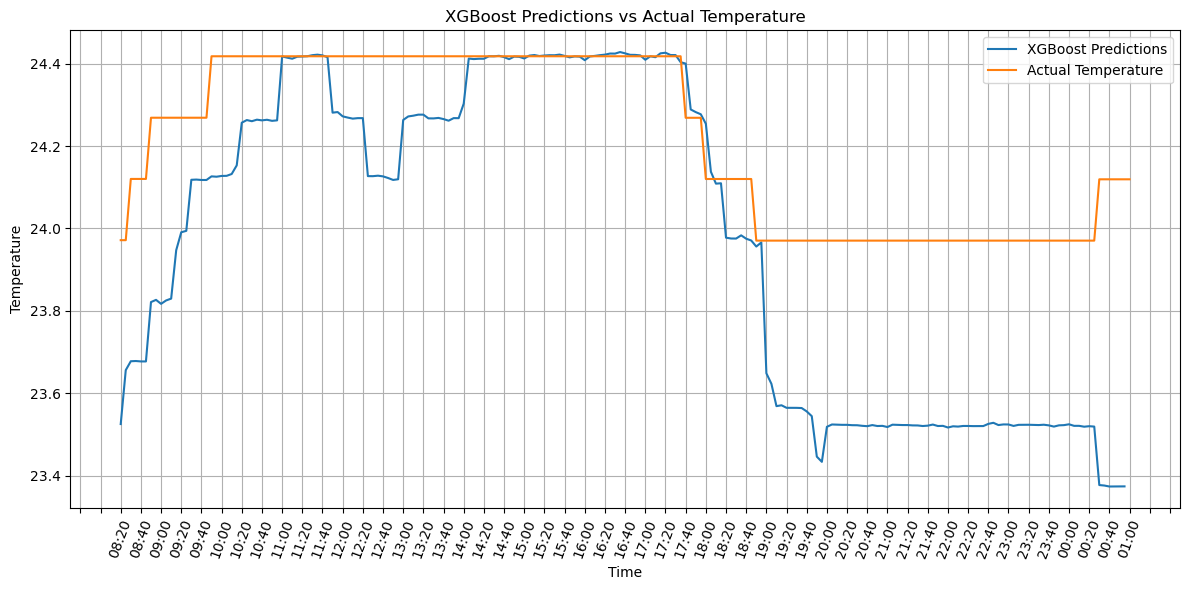

In [150]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
xgboost_predictions_file = r'C:\Users\syounas\OneDrive - Enova Facilities Management\Tasks\GitHub\HubgradeDataCleaning\Sana\Data\xgboost_predictions.csv'
test_data_file = r'C:\Users\syounas\OneDrive - Enova Facilities Management\Tasks\GitHub\HubgradeDataCleaning\Sana\Data\test_with200.xlsx'

# Read the data into DataFrames
df_xgboost = pd.read_csv(xgboost_predictions_file)
df_test = pd.read_excel(test_data_file)

# Convert 'ds' column to datetime with specified format
df_xgboost['ds'] = pd.to_datetime(df_xgboost['ds'], format='%Y-%m-%dT%H:%M:%S%z Dubai')
df_test['ds'] = pd.to_datetime(df_test['ds'], format='%Y-%m-%dT%H:%M:%S%z Dubai')

# Extract hour and minute from datetime
df_xgboost['time'] = df_xgboost['ds'].dt.strftime('%H:%M')
df_test['time'] = df_test['ds'].dt.strftime('%H:%M')

# Plotting the data
plt.figure(figsize=(12, 6))
plt.plot(df_xgboost['time'], df_xgboost['yhat'], label='XGBoost Predictions')
plt.plot(df_test['time'], df_test['yhat'], label='Actual Temperature')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('XGBoost Predictions vs Actual Temperature')
plt.legend()
plt.xticks(rotation=70)
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(4))  # Major ticks every 4 points
plt.grid(True)
plt.tight_layout()
plt.show()


In [152]:
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import numpy as np
from datetime import datetime, timedelta, timezone

# Load the data
file_path = r'C:\Users\syounas\OneDrive - Enova Facilities Management\Tasks\GitHub\HubgradeDataCleaning\Sana\Data\Train_1.csv'
data = pd.read_csv(file_path)

# Rename columns for convenience
data.columns = ['ts', 'temp']

# Convert 'ts' column to datetime and handle timezone offset
data['ts'] = pd.to_datetime(data['ts'].str.replace(' Dubai', ''), errors='coerce', dayfirst=True)
# Drop rows where datetime parsing failed
data = data.dropna(subset=['ts'])

# Clean temperature column and convert to numeric
data['temp'] = data['temp'].str.replace('°C', '').astype(float)

# Separate data for temperature
df_temp = data[['ts', 'temp']].rename(columns={'ts': 'ds', 'temp': 'y'})

# Ensure 'ds' column is timezone-naive
df_temp['ds'] = df_temp['ds'].dt.tz_localize(None)

# Extract numerical features from datetime
df_temp['year'] = df_temp['ds'].dt.year
df_temp['month'] = df_temp['ds'].dt.month
df_temp['day'] = df_temp['ds'].dt.day
df_temp['hour'] = df_temp['ds'].dt.hour
df_temp['minute'] = df_temp['ds'].dt.minute

# Define dq_start
dq_start = datetime(2023, 3, 11, 8, 20, tzinfo=timezone.utc)

# Create future DataFrame starting from dq_start
future_periods = 200  # Number of future periods to predict
future_temp = pd.DataFrame()
future_temp['ds'] = [dq_start + timedelta(minutes=5*i) for i in range(future_periods)]

# Extract features for XGBoost
future_temp['year'] = future_temp['ds'].dt.year
future_temp['month'] = future_temp['ds'].dt.month
future_temp['day'] = future_temp['ds'].dt.day
future_temp['hour'] = future_temp['ds'].dt.hour
future_temp['minute'] = future_temp['ds'].dt.minute

# Initialize XGBoost model with tuned parameters
model_temp = xgb.XGBRegressor(
    n_estimators=100,  # Example value, adjust as necessary
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Fit the model
model_temp.fit(df_temp[['year', 'month', 'day', 'hour', 'minute']], df_temp['y'])

# Predict the future values
future_temp['yhat'] = model_temp.predict(future_temp[['year', 'month', 'day', 'hour', 'minute']])

# Calculate RMSE for the last 200 points in the training data
y_true = df_temp['y'].values[-200:]
y_pred = model_temp.predict(df_temp[['year', 'month', 'day', 'hour', 'minute']])[-200:]
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print(f"RMSE for the last 200 training points: {rmse}")

# Format the 'ds' column in future_temp to "2023-03-11T08:20:00+04:00 Dubai"
future_temp['ds'] = future_temp['ds'].dt.strftime('%Y-%m-%dT%H:%M:%S%z') + ' Dubai'

# Save only the predicted 200 future values (ds and yhat columns) to a CSV file
output_path = r'C:\Users\syounas\OneDrive - Enova Facilities Management\Tasks\GitHub\HubgradeDataCleaning\Sana\Data\xgboost_tune.csv'
future_temp[['ds', 'yhat']].tail(200).to_csv(output_path, index=False)


RMSE for the last 200 training points: 0.027896385956254453


In [180]:
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import numpy as np
from datetime import datetime, timedelta, timezone

# Load the data
file_path = r'C:\Users\syounas\OneDrive - Enova Facilities Management\Tasks\GitHub\HubgradeDataCleaning\Sana\Data\Train_1.csv'
data = pd.read_csv(file_path)

# Rename columns for convenience
data.columns = ['ts', 'temp']

# Convert 'ts' column to datetime and handle timezone offset
data['ts'] = pd.to_datetime(data['ts'].str.replace(' Dubai', ''), errors='coerce', dayfirst=True)
# Drop rows where datetime parsing failed
data = data.dropna(subset=['ts'])

# Clean temperature column and convert to numeric
data['temp'] = data['temp'].str.replace('°C', '').astype(float)

# Separate data for temperature
df_temp = data[['ts', 'temp']].rename(columns={'ts': 'ds', 'temp': 'y'})

# Ensure 'ds' column is timezone-naive
df_temp['ds'] = df_temp['ds'].dt.tz_localize(None)

# Extract numerical features from datetime
df_temp['year'] = df_temp['ds'].dt.year
df_temp['month'] = df_temp['ds'].dt.month
df_temp['day'] = df_temp['ds'].dt.day
df_temp['hour'] = df_temp['ds'].dt.hour
df_temp['minute'] = df_temp['ds'].dt.minute

# Define dq_start
dq_start = datetime(2023, 3, 11, 8, 20, tzinfo=timezone.utc)

# Create future DataFrame starting from dq_start
future_periods = 200  # Number of future periods to predict
future_temp = pd.DataFrame()
future_temp['ds'] = [dq_start + timedelta(minutes=5*i) for i in range(future_periods)]

# Extract features for XGBoost
future_temp['year'] = future_temp['ds'].dt.year
future_temp['month'] = future_temp['ds'].dt.month
future_temp['day'] = future_temp['ds'].dt.day
future_temp['hour'] = future_temp['ds'].dt.hour
future_temp['minute'] = future_temp['ds'].dt.minute

# Initialize XGBoost model with parameters to reduce noise
model_temp = xgb.XGBRegressor(
    n_estimators=100,   # Number of boosting rounds
    max_depth=3,        # Maximum depth of each tree
    learning_rate=0.1,  # Learning rate
    min_child_weight=1, # Minimum sum of instance weight needed in a child
    subsample=0.8,      # Subsample ratio of the training instances
    colsample_bytree=0.8,  # Subsample ratio of columns when constructing each tree
    objective='reg:squarederror'  # Objective function for regression task
)

# Fit the model
model_temp.fit(df_temp[['year', 'month', 'day', 'hour', 'minute']], df_temp['y'])

# Predict the future values
future_temp['yhat'] = model_temp.predict(future_temp[['year', 'month', 'day', 'hour', 'minute']])

# Calculate RMSE for the last 200 points in the training data
y_true = df_temp['y'].values[-200:]
y_pred = model_temp.predict(df_temp[['year', 'month', 'day', 'hour', 'minute']])[-200:]
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print(f"RMSE for the last 200 training points: {rmse}")

# Format the 'ds' column in future_temp to "2023-03-11T08:20:00+04:00 Dubai"
future_temp['ds'] = future_temp['ds'].dt.strftime('%Y-%m-%dT%H:%M:%S%z') + ' Dubai'

# Save only the predicted 200 future values (ds and yhat columns) to a CSV file
output_path = r'C:\Users\syounas\OneDrive - Enova Facilities Management\Tasks\GitHub\HubgradeDataCleaning\Sana\Data\xgboost_tune2.csv'
future_temp[['ds', 'yhat']].tail(200).to_csv(output_path, index=False)


RMSE for the last 200 training points: 0.06878121691440173


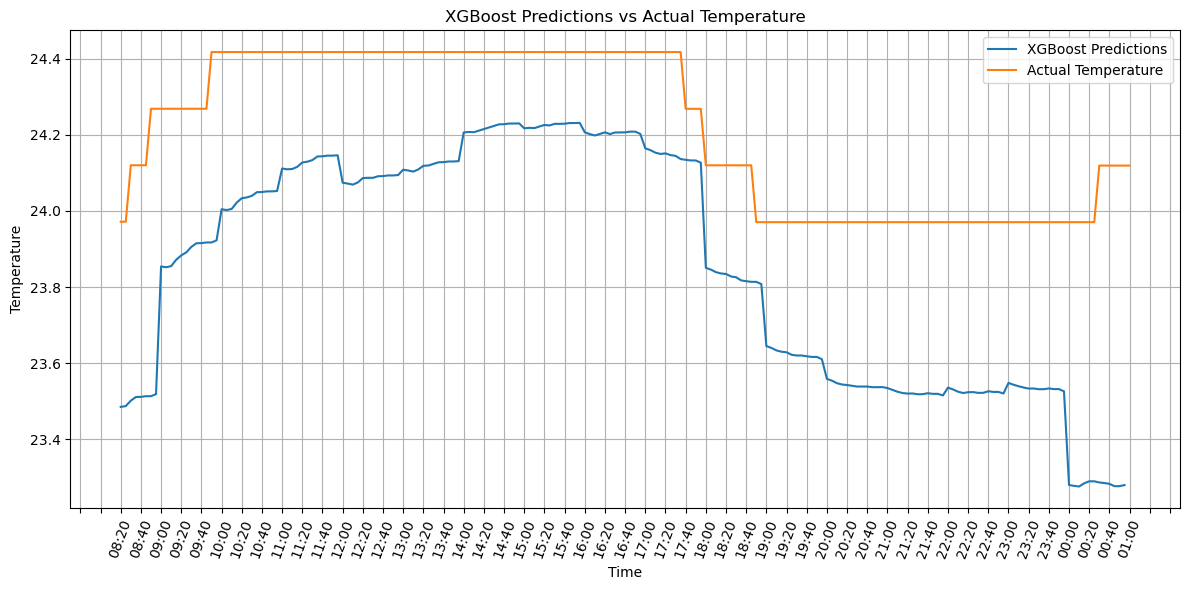

In [182]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
xgboost_predictions_file = r'C:\Users\syounas\OneDrive - Enova Facilities Management\Tasks\GitHub\HubgradeDataCleaning\Sana\Data\xgboost_tune2.csv'
test_data_file = r'C:\Users\syounas\OneDrive - Enova Facilities Management\Tasks\GitHub\HubgradeDataCleaning\Sana\Data\test_with200.xlsx'

# Read the data into DataFrames
df_xgboost = pd.read_csv(xgboost_predictions_file)
df_test = pd.read_excel(test_data_file)

# Convert 'ds' column to datetime with specified format
df_xgboost['ds'] = pd.to_datetime(df_xgboost['ds'], format='%Y-%m-%dT%H:%M:%S%z Dubai')
df_test['ds'] = pd.to_datetime(df_test['ds'], format='%Y-%m-%dT%H:%M:%S%z Dubai')

# Extract hour and minute from datetime
df_xgboost['time'] = df_xgboost['ds'].dt.strftime('%H:%M')
df_test['time'] = df_test['ds'].dt.strftime('%H:%M')

# Plotting the data
plt.figure(figsize=(12, 6))
plt.plot(df_xgboost['time'], df_xgboost['yhat'], label='XGBoost Predictions')
plt.plot(df_test['time'], df_test['yhat'], label='Actual Temperature')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('XGBoost Predictions vs Actual Temperature')
plt.legend()
plt.xticks(rotation=70)
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(4))  # Major ticks every 4 points
plt.grid(True)
plt.tight_layout()
plt.show()


In [220]:
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import numpy as np
from datetime import datetime, timedelta, timezone

# Load the data
file_path = r'C:\Users\syounas\OneDrive - Enova Facilities Management\Tasks\GitHub\HubgradeDataCleaning\Sana\Data\Train_1.csv'
data = pd.read_csv(file_path)

# Rename columns for convenience
data.columns = ['ts', 'temp']

# Convert 'ts' column to datetime and handle timezone offset
data['ts'] = pd.to_datetime(data['ts'].str.replace(' Dubai', ''), errors='coerce', dayfirst=True)
# Drop rows where datetime parsing failed
data = data.dropna(subset=['ts'])

# Clean temperature column and convert to numeric
data['temp'] = data['temp'].str.replace('°C', '').astype(float)

# Separate data for temperature
df_temp = data[['ts', 'temp']].rename(columns={'ts': 'ds', 'temp': 'y'})

# Ensure 'ds' column is timezone-naive
df_temp['ds'] = df_temp['ds'].dt.tz_localize(None)

# Extract numerical features from datetime
df_temp['year'] = df_temp['ds'].dt.year
df_temp['month'] = df_temp['ds'].dt.month
df_temp['day'] = df_temp['ds'].dt.day
df_temp['hour'] = df_temp['ds'].dt.hour
df_temp['minute'] = df_temp['ds'].dt.minute

# Define dq_start
dq_start = datetime(2023, 3, 11, 8, 20, tzinfo=timezone.utc)

# Create future DataFrame starting from dq_start
future_periods = 200  # Number of future periods to predict
future_temp = pd.DataFrame()
future_temp['ds'] = [dq_start + timedelta(minutes=5*i) for i in range(future_periods)]

# Extract features for XGBoost
future_temp['year'] = future_temp['ds'].dt.year
future_temp['month'] = future_temp['ds'].dt.month
future_temp['day'] = future_temp['ds'].dt.day
future_temp['hour'] = future_temp['ds'].dt.hour
future_temp['minute'] = future_temp['ds'].dt.minute

# Initialize XGBoost model with parameters to reduce noise
model_temp = xgb.XGBRegressor(
    n_estimators=90,   # Number of boosting rounds
    max_depth=1,        # Maximum depth of each tree
    learning_rate=0.1,  # Learning rate
    min_child_weight=1, # Minimum sum of instance weight needed in a child
    subsample=0.8,      # Subsample ratio of the training instances
    colsample_bytree=0.8,  # Subsample ratio of columns when constructing each tree
    objective='reg:squarederror'  # Objective function for regression task
)

# Fit the model
model_temp.fit(df_temp[['year', 'month', 'day', 'hour', 'minute']], df_temp['y'])

# Predict the future values
future_temp['yhat'] = model_temp.predict(future_temp[['year', 'month', 'day', 'hour', 'minute']])

# Calculate RMSE for the last 200 points in the training data
y_true = df_temp['y'].values[-200:]
y_pred = model_temp.predict(df_temp[['year', 'month', 'day', 'hour', 'minute']])[-200:]
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print(f"RMSE for the last 200 training points: {rmse}")

# Format the 'ds' column in future_temp to "2023-03-11T08:20:00+04:00 Dubai"
future_temp['ds'] = future_temp['ds'].dt.strftime('%Y-%m-%dT%H:%M:%S%z') + ' Dubai'

# Save only the predicted 200 future values (ds and yhat columns) to a CSV file
output_path = r'C:\Users\syounas\OneDrive - Enova Facilities Management\Tasks\GitHub\HubgradeDataCleaning\Sana\Data\xgboost_tune3.csv'
future_temp[['ds', 'yhat']].tail(200).to_csv(output_path, index=False)


RMSE for the last 200 training points: 0.12176719056634505


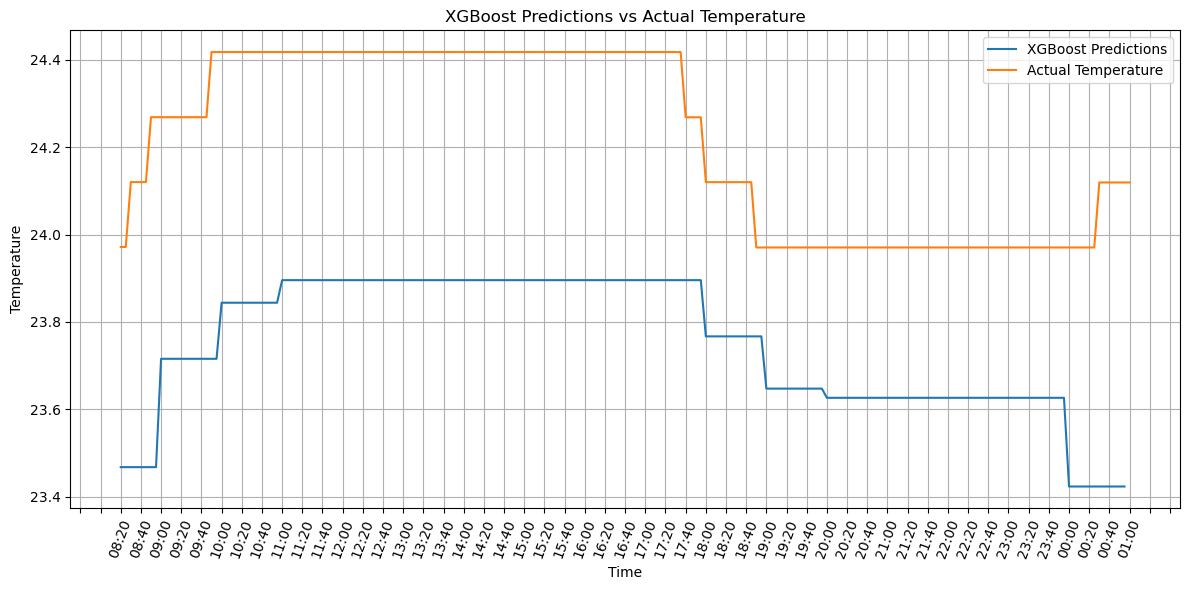

In [222]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
xgboost_predictions_file = r'C:\Users\syounas\OneDrive - Enova Facilities Management\Tasks\GitHub\HubgradeDataCleaning\Sana\Data\xgboost_tune3.csv'
test_data_file = r'C:\Users\syounas\OneDrive - Enova Facilities Management\Tasks\GitHub\HubgradeDataCleaning\Sana\Data\test_with200.xlsx'

# Read the data into DataFrames
df_xgboost = pd.read_csv(xgboost_predictions_file)
df_test = pd.read_excel(test_data_file)

# Convert 'ds' column to datetime with specified format
df_xgboost['ds'] = pd.to_datetime(df_xgboost['ds'], format='%Y-%m-%dT%H:%M:%S%z Dubai')
df_test['ds'] = pd.to_datetime(df_test['ds'], format='%Y-%m-%dT%H:%M:%S%z Dubai')

# Extract hour and minute from datetime
df_xgboost['time'] = df_xgboost['ds'].dt.strftime('%H:%M')
df_test['time'] = df_test['ds'].dt.strftime('%H:%M')

# Plotting the data
plt.figure(figsize=(12, 6))
plt.plot(df_xgboost['time'], df_xgboost['yhat'], label='XGBoost Predictions')
plt.plot(df_test['time'], df_test['yhat'], label='Actual Temperature')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('XGBoost Predictions vs Actual Temperature')
plt.legend()
plt.xticks(rotation=70)
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(4))  # Major ticks every 4 points
plt.grid(True)
plt.tight_layout()
plt.show()
